In [26]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [27]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
train.head()
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [28]:
test_ids = test['PassengerId']

In [29]:
titles = [
    "Mr", "Capt", "Col", "Major", "Dr", "Rev", "Jonkheer", "Don", "Sir",
    "Mme", "Mrs", "Countess", "Dona", "Lady",
    "Master",
    "Ms", "Mlle", "Miss"
]

def extract_title(name):
    for t in titles:
        if t in name:
            return t
    return None

In [30]:
import numpy as np

### Creating FamilySize feature
train['FamilySize'] = train['SibSp'] + train['Parch']

### Age imputing & Creating AgeBins feature
train['Age'].fillna(train['Age'].mean(), inplace=True)
train_min = train["Age"].min()
train_max = train["Age"].max()
bins = np.linspace(train_min, train_max, 6)
print(bins)
# Add -inf and inf because the test data might contain values outside the limits of test data, so if the test contains smaller values, they will be added as the first bin; if the test contains bigger values, they will be added as the last bin
bins[0] = -np.inf
bins[-1] = np.inf
print(bins)
labels = range(len(bins) - 1)

train['AgeBin'] = pd.cut(train['Age'], bins=bins, labels=labels, include_lowest=True)
train['AgeBin'] = train['AgeBin'].astype(int)

### Fair imputing
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

### Add Title column
train['Title'] = train['Name'].apply(extract_title)
#

train.head()

[ 0.42  16.336 32.252 48.168 64.084 80.   ]
[  -inf 16.336 32.252 48.168 64.084    inf]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeBin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,Mr
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,Mr


In [31]:
# Creating FamilySize feature
test['FamilySize'] = test['SibSp'] + test['Parch']

# Age imputing & Creating AgeBins feature
test['Age'].fillna(train['Age'].mean(), inplace=True)
test['AgeBin'] = pd.cut(test['Age'], bins=bins, labels=labels, include_lowest=True)
test['AgeBin'] = test['AgeBin'].astype(int)

### Fair imputing
test['Fare'] = test['Fare'].fillna(train['Fare'].mean())

### Add Title column
test['Title'] = test['Name'].apply(extract_title)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeBin,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,2,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,2,Mr
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,3,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,1,Mr


In [32]:
train = train.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked', 'SibSp', 'Parch', 'Age'])
print(train.head())

test = test.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked', 'SibSp', 'Parch', 'Age'])

print(test.head())


   Survived  Pclass     Sex     Fare  FamilySize  AgeBin Title
0         0       3    male   7.2500           1       1    Mr
1         1       1  female  71.2833           1       2    Mr
2         1       3  female   7.9250           0       1  Miss
3         1       1  female  53.1000           1       2    Mr
4         0       3    male   8.0500           0       2    Mr
   Pclass     Sex     Fare  FamilySize  AgeBin Title
0       3    male   7.8292           0       2    Mr
1       3  female   7.0000           1       2    Mr
2       2    male   9.6875           0       3    Mr
3       3    male   8.6625           0       1    Mr
4       3  female  12.2875           2       1    Mr


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
categorical_cols = ['Sex', 'Title']

label_encoder = LabelEncoder()

for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.transform(test[col])

train.head()

,Survived,Pclass,Sex,Fare,FamilySize,AgeBin,Title
0,0,3,1,7.2500,1,1,11
1,1,1,0,71.2833,1,2,11
2,1,3,0,7.9250,0,1,8
3,1,1,0,53.1000,1,2,11
4,0,3,1,8.0500,0,2,11


            Survived    Pclass       Sex      Fare  FamilySize    AgeBin  \
Survived    1.000000 -0.338481 -0.543351  0.257307    0.016639 -0.043800   
Pclass     -0.338481  1.000000  0.131900 -0.549500    0.065997 -0.358769   
Sex        -0.543351  0.131900  1.000000 -0.182333   -0.200988  0.070220   
Fare        0.257307 -0.549500 -0.182333  1.000000    0.217138  0.123640   
FamilySize  0.016639  0.065997 -0.200988  0.217138    1.000000 -0.217063   
AgeBin     -0.043800 -0.358769  0.070220  0.123640   -0.217063  1.000000   
Title      -0.292775  0.064215  0.390103 -0.111998   -0.246450  0.230667   

               Title  
Survived   -0.292775  
Pclass      0.064215  
Sex         0.390103  
Fare       -0.111998  
FamilySize -0.246450  
AgeBin      0.230667  
Title       1.000000  


<Axes: >

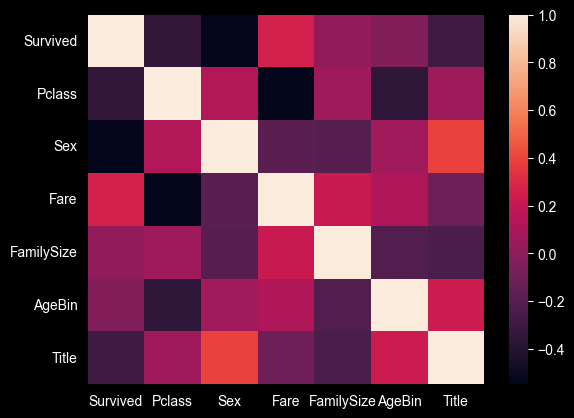

In [35]:
import seaborn as sns

print(train.corr())
sns.heatmap(train.corr())

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(train.drop(columns=['Survived']), train['Survived'])

In [37]:
from xgboost import XGBClassifier

In [38]:
xgboost =  XGBClassifier()
xgboost.fit(X_train, Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
}

grid_search_cv = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search_cv.fit(X_train, Y_train)
grid_search_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 500,
 'subsample': 1.0}

In [40]:
Y_pred = grid_search_cv.predict(X_val)
print("Accuracy: ", f"{grid_search_cv.score(X_val, Y_val):.4}")

Accuracy:  0.8994


In [41]:
Y_pred = grid_search_cv.predict(test)

submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': (Y_pred > 0.5).astype(int).flatten()
})

print(submission)

submission.to_csv('submission.csv', index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
